In [1]:
using DataFrames, CSV
using StatsPlots

In [66]:
pathToDir = "./LogN_a_2a_LogN_b_2b/"
files = []
labels = []
for f in readdir(pathToDir)
    if endswith(f, ".csv")
        push!(files, pathToDir * f)
        push!(labels, f[1:first(findlast("_", f))-1])
    end
end
@show files[1]
labels

files[1] = "./LogN_a_2a_LogN_b_2b/oneSided_pooled_0.025.csv"


4-element Vector{Any}:
 "oneSided_pooled"
 "oneSided_unpooled"
 "twoSided_pooled"
 "twoSided_unpooled"

In [56]:
dataframes = [DataFrame(CSV.File(f)) for f in files];

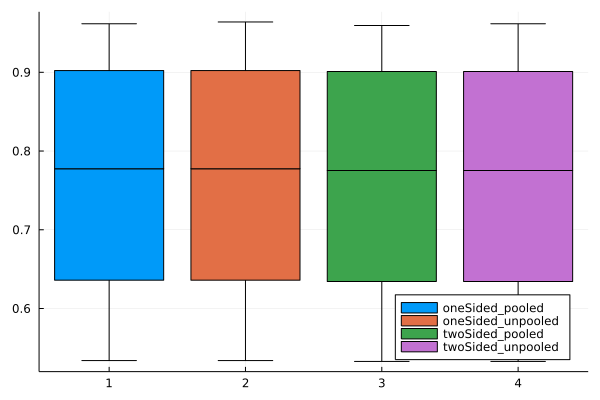

In [59]:
boxplots = boxplot([df.prob for df in dataframes], label=hcat(labels...), legend = :bottomright)

In [65]:
savefig(boxplots, pathToDir * "boxplot.png")

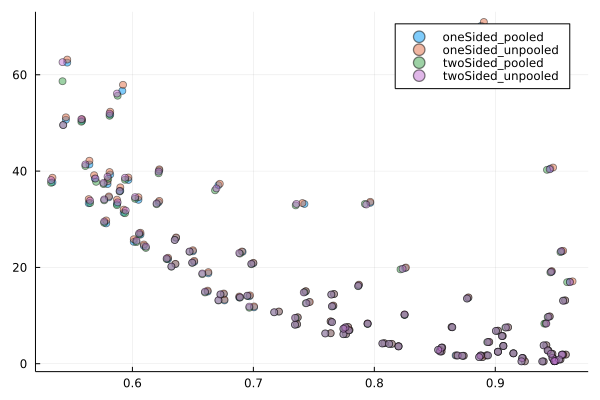

In [61]:
scatterPlot = scatter([(df.prob, df.width) for df in dataframes], label=hcat(labels...),
              legend = :topright, markeralpha = 0.5)

In [64]:
savefig(scatterPlot, pathToDir * "scatter.png")